## Final Project Submission

Please fill out:
* Student name: Dennis Muendo
* Student pace: part time 
* Scheduled project review date/time: 
* Instructor name: Stella Waithera
* Blog post URL:


## Overview
Microsoft has decided to create their own movie studio but they have no working knowledge of the movie industry and need guidance to create profitable content. In this project, we use EDAs to get valuable information by analyzing datasets from Box Office Mojo, IMDB and The Numbers, then use the insights to come up with recommendations.In our analysis, we used return on investment as a criteria to assess the viability of several genres. To come to our conclusions, we also looked at the studios with the best box office results and the genres with the highest viewer ratings.

### Business Problem
Microsoft want to venture into movie creation but they don't know anything about it.This analysis mainly focuses on looking at the prevalent patterns in popular movies. The CEO of Microsoft's new movie company can use the insightful findings from an exploratory data analysis to decide on the genres and topics of the movies they should develop.

The following questions will be adressed:
1. Relation between production and profits. 
2. Determining the most common genre.
3. Which genre of movies have a higher average rating?
4. Which studios are successful in terms of gross income?

### Data Understanding
This analysis involves utilizing data from three different movie websites, Box Office, IMDB and The Numbers.

The first dataset, bom.movie_gross.csv, contains movie titles, studios, domestic and foreign financial earnings, and release year.

In [1]:
#Import all necessary libaries used for reading and analyzing data
import numpy as np
import pandas as pd
import csv
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#inspecting bom_gross and begin the cleaning process
bom_gross = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
bom_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [3]:
#sampling my data
bom_gross.sample(5)

,title,studio,domestic_gross,foreign_gross,year
123,Furry Vengeance,Sum.,17600000.0,18600000,2010
3115,Halloween (2018),Uni.,159300000.0,96100000,2018
548,Carancho,Strand,85500.0,3900000,2011
2255,The Forbidden Room,KL,34400.0,NaN,2015
1977,The Woman in Black 2: Angel of Death,Rela.,26500000.0,22400000,2015


In [4]:
#checking for number of rows and columns
bom_gross.shape

(3387, 5)

In [5]:
#print out column names
bom_gross.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [6]:
#getting an overview of the data
bom_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


#### Cleaning the bom_gross

In [7]:
#identify duplicated data
duplicate_rows = bom_gross[bom_gross.duplicated()]
duplicate_rows

,title,studio,domestic_gross,foreign_gross,year


In [8]:
#cheking for missing values
missing_values = bom_gross.isna()
missing_values

,title,studio,domestic_gross,foreign_gross,year
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
3382,False,False,False,True,False
3383,False,False,False,True,False
3384,False,False,False,True,False
3385,False,False,False,True,False


In [9]:
#write a function to interprete missing values
def missing_values(bom_gross):
    miss = bom_gross.isna().sum().sort_values(ascending = False)
    percentage_miss = (bom_gross.isna().sum() / len(bom_gross)).sort_values(ascending = False)
    missing = pd.DataFrame({'missing_values': miss, 'percentage': percentage_miss}).reset_index()
    missing.drop(missing[missing['percentage'] == 0].index, inplace = True)
    return missing

In [10]:
missing_data = missing_values(bom_gross)
missing_data

,index,missing_values,percentage
0,foreign_gross,1350,0.398583
1,domestic_gross,28,0.008267
2,studio,5,0.001476


In [11]:
# using str.replace to remove commas and astype.float to convert the cleaned string to float
bom_gross['foreign_gross'] = bom_gross['foreign_gross'].str.replace(',', '').astype(float)

We may infer from the bom_gross dataset that movie entries with NaN values had neither domestic gross nor foreign income for that year, hence  we replace the value with 0.

For the studio column we drop rows with null values.

In [12]:
#replace the missing values of foreign_gross and domestic_gross with 0.
bom_gross['domestic_gross'] = bom_gross.domestic_gross.fillna(0)  
bom_gross['foreign_gross'] = bom_gross.foreign_gross.fillna(0) 

In [13]:
#cleaning studio by dropping the rows with NaN values
bom_gross.dropna(axis = 0, subset = ['studio'], inplace = True)

In [14]:
#checking bom_gross final data
bom_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,0.0,2018
3383,Edward II (2018 re-release),FM,4800.0,0.0,2018
3384,El Pacto,Sony,2500.0,0.0,2018
3385,The Swan,Synergetic,2400.0,0.0,2018


##### The second dataset is tn.movie_budgets.csv.gz

In [15]:
#Cleaning and analyising movie budget data
movie_budget = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
movie_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [16]:
movie_budget.shape

(5782, 6)

In [17]:
movie_budget.columns

Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')

In [18]:
movie_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


We clean up this dataframe by replacing commas and dollar signs in the worldwide_gross, production_budget, and domestic_gross columns with nothing ('') and then convert them to floats.

In [19]:
#changing the data types for different strings to float/int
movie_budget['worldwide_gross'] = movie_budget['worldwide_gross'].map(lambda x: (x.strip('$').replace(',' , '')))
movie_budget['production_budget'] = movie_budget['production_budget'].map(lambda x: (x.strip('$').replace(',' , '')))
movie_budget['domestic_gross'] = movie_budget['domestic_gross'].map(lambda x: (x.strip('$').replace(',' , '')))

In [20]:
#change the datatypes of the columns
movie_budget['domestic_gross'] = movie_budget['domestic_gross'].astype('int')
movie_budget['worldwide_gross'] = movie_budget['worldwide_gross'].astype('int64')
movie_budget['production_budget'] = movie_budget['production_budget'].astype('int')
movie_budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0
5778,79,"Apr 2, 1999",Following,6000,48482,240495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0


### Merging dataframes
We merge the two dataframes 'title' as our common column and also drop the 'domestic_gross_y' and 'title' because they appear on both dataframes.

In [21]:
#merge the bom_gross and movie_budget on movie titles
merged_df = pd.merge(bom_gross, movie_budget, how='inner', left_on='title', right_on='movie')
#drop title and domestic_gross since they appear in both dataframes
merged_df = merged_df.drop(['domestic_gross_y', 'title'], axis=1)
#preview the merged dataframe
merged_df

,studio,domestic_gross_x,foreign_gross,year,id,release_date,movie,production_budget,worldwide_gross
0,BV,415000000.0,652000000.0,2010,47,"Jun 18, 2010",Toy Story 3,200000000,1068879522
1,WB,292600000.0,535700000.0,2010,38,"Jul 16, 2010",Inception,160000000,835524642
2,P/DW,238700000.0,513900000.0,2010,27,"May 21, 2010",Shrek Forever After,165000000,756244673
3,Sum.,300500000.0,398000000.0,2010,53,"Jun 30, 2010",The Twilight Saga: Eclipse,68000000,706102828
4,Par.,312400000.0,311500000.0,2010,15,"May 7, 2010",Iron Man 2,170000000,621156389
...,...,...,...,...,...,...,...,...,...
1241,VE,4300000.0,0.0,2018,64,"Jun 15, 2018",Gotti,10000000,6089100
1242,RAtt.,3700000.0,0.0,2018,95,"Dec 7, 2018",Ben is Back,13000000,9633111
1243,VE,491000.0,1700000.0,2018,100,"Feb 2, 2018",Bilal: A New Breed of Hero,30000000,648599
1244,RLJ,1200000.0,0.0,2018,71,"Sep 14, 2018",Mandy,6000000,1427656


In [22]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1246 entries, 0 to 1245
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   studio             1246 non-null   object 
 1   domestic_gross_x   1246 non-null   float64
 2   foreign_gross      1246 non-null   float64
 3   year               1246 non-null   int64  
 4   id                 1246 non-null   int64  
 5   release_date       1246 non-null   object 
 6   movie              1246 non-null   object 
 7   production_budget  1246 non-null   int32  
 8   worldwide_gross    1246 non-null   int64  
dtypes: float64(2), int32(1), int64(3), object(3)
memory usage: 92.5+ KB


#### Third dataset is 'imdb.title.basics.csv.gz'

In [23]:
imdb_basics = pd.read_csv('zippedData/imdb.title.basics.csv.gz')
imdb_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [24]:
imdb_basics.columns

Index(['tconst', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres'],
      dtype='object')

In [25]:
imdb_basics.shape

(146144, 6)

In [26]:
imdb_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [27]:
imdb_basics.describe()

,start_year,runtime_minutes
count,146144.000000,114405.000000
mean,2014.621798,86.187247
std,2.733583,166.360590
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2015.000000,87.000000
75%,2017.000000,99.000000
max,2115.000000,51420.000000


In [28]:
# drop unuseful columns like runtime minutes
imdb_basics.drop('runtime_minutes', axis = 1, inplace = True)

In [29]:
#cheking for missing values
missing_values = imdb_basics.isna()
missing_values

,tconst,primary_title,original_title,start_year,genres
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
146139,False,False,False,False,False
146140,False,False,False,False,False
146141,False,False,False,False,False
146142,False,False,False,False,True


In [30]:
#write a function to interprete missing values
def missing_values(imdb_basics):
    miss = imdb_basics.isna().sum().sort_values(ascending = False)
    percentage_miss = (imdb_basics.isna().sum() / len(imdb_basics)).sort_values(ascending = False)
    missing = pd.DataFrame({'missing_values': miss, 'percentage': percentage_miss}).reset_index()
    missing.drop(missing[missing['percentage'] == 0].index, inplace = True)
    return missing

In [31]:
missing_values(imdb_basics)

,index,missing_values,percentage
0,genres,5408,0.037005
1,original_title,21,0.000144


In [32]:
#dropping rows
imdb_basics.dropna(axis = 0, subset = ['genres', 'original_title'], inplace = True)

In [33]:
#final imdb_basics data
imdb_basics

,tconst,primary_title,original_title,start_year,genres
0,tt0063540,Sunghursh,Sunghursh,2013,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,"Comedy,Drama,Fantasy"
...,...,...,...,...,...
146138,tt9916428,The Secret of China,The Secret of China,2019,"Adventure,History,War"
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,Comedy


### Fourth dataset is 'imdb.title.ratings.csv.gz'

In [34]:
imdb_ratings = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')
imdb_ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [35]:
imdb_ratings.shape

(73856, 3)

In [36]:
imdb_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [37]:
imdb_ratings.describe()

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


In [38]:
# Cheking for messing values
imdb_ratings.isna().sum()

tconst           0
averagerating    0
numvotes         0
dtype: int64

### Merging dataframes
We merge the imdb_basics and imdb_ratings with 'tconst' as our common column 

In [39]:
#merge imdb_title_df and imdb_ratings using an inner join
merged_imdb_df = imdb_basics.merge(imdb_ratings, on='tconst', how='inner')
merged_imdb_df

,tconst,primary_title,original_title,start_year,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...
73047,tt9913056,Swarm Season,Swarm Season,2019,Documentary,6.2,5
73048,tt9913084,Diabolik sono io,Diabolik sono io,2019,Documentary,6.2,6
73049,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,"Drama,Family",8.7,136
73050,tt9914642,Albatross,Albatross,2017,Documentary,8.5,8


## Data Analysis and Visualizations

1. Which film/movies make the highest profits

In [40]:
# Merged dataframe for bom_gross and movie_budget
merged_df

,studio,domestic_gross_x,foreign_gross,year,id,release_date,movie,production_budget,worldwide_gross
0,BV,415000000.0,652000000.0,2010,47,"Jun 18, 2010",Toy Story 3,200000000,1068879522
1,WB,292600000.0,535700000.0,2010,38,"Jul 16, 2010",Inception,160000000,835524642
2,P/DW,238700000.0,513900000.0,2010,27,"May 21, 2010",Shrek Forever After,165000000,756244673
3,Sum.,300500000.0,398000000.0,2010,53,"Jun 30, 2010",The Twilight Saga: Eclipse,68000000,706102828
4,Par.,312400000.0,311500000.0,2010,15,"May 7, 2010",Iron Man 2,170000000,621156389
...,...,...,...,...,...,...,...,...,...
1241,VE,4300000.0,0.0,2018,64,"Jun 15, 2018",Gotti,10000000,6089100
1242,RAtt.,3700000.0,0.0,2018,95,"Dec 7, 2018",Ben is Back,13000000,9633111
1243,VE,491000.0,1700000.0,2018,100,"Feb 2, 2018",Bilal: A New Breed of Hero,30000000,648599
1244,RLJ,1200000.0,0.0,2018,71,"Sep 14, 2018",Mandy,6000000,1427656


In [41]:
# Calculate profit using production_budget, domestic_gross, and worldwide_gross
# change the scientific notations to fixed-point notation
merged_df['profit'] = merged_df['domestic_gross_x'] + merged_df['worldwide_gross'] - merged_df['production_budget']
pd.options.display.float_format = '{:.2f}'.format
merged_df

,studio,domestic_gross_x,foreign_gross,year,id,release_date,movie,production_budget,worldwide_gross,profit
0,BV,415000000.00,652000000.00,2010,47,"Jun 18, 2010",Toy Story 3,200000000,1068879522,1283879522.00
1,WB,292600000.00,535700000.00,2010,38,"Jul 16, 2010",Inception,160000000,835524642,968124642.00
2,P/DW,238700000.00,513900000.00,2010,27,"May 21, 2010",Shrek Forever After,165000000,756244673,829944673.00
3,Sum.,300500000.00,398000000.00,2010,53,"Jun 30, 2010",The Twilight Saga: Eclipse,68000000,706102828,938602828.00
4,Par.,312400000.00,311500000.00,2010,15,"May 7, 2010",Iron Man 2,170000000,621156389,763556389.00
...,...,...,...,...,...,...,...,...,...,...
1241,VE,4300000.00,0.00,2018,64,"Jun 15, 2018",Gotti,10000000,6089100,389100.00
1242,RAtt.,3700000.00,0.00,2018,95,"Dec 7, 2018",Ben is Back,13000000,9633111,333111.00
1243,VE,491000.00,1700000.00,2018,100,"Feb 2, 2018",Bilal: A New Breed of Hero,30000000,648599,-28860401.00
1244,RLJ,1200000.00,0.00,2018,71,"Sep 14, 2018",Mandy,6000000,1427656,-3372344.00


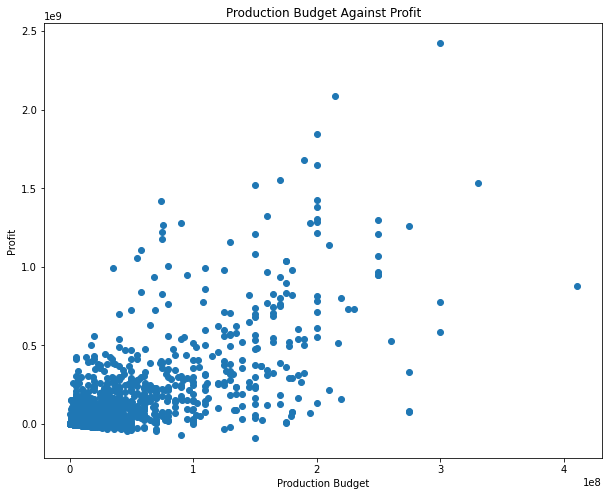

In [42]:
# Plotting scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(merged_df['production_budget'], merged_df['profit'])
plt.xlabel('Production Budget')
plt.ylabel('Profit')
plt.title('Production Budget Against Profit')
plt.show();

In [43]:
corr_profit = merged_df['production_budget'].corr(merged_df['profit'])
print('correlation profit:', corr_profit)

correlation profit: 0.6813365707560181


From the scatter plot above, it ie evident that there is a moderate positive correlation between profit and production budget.

In [44]:
movie_profit = merged_df[['studio','movie', 'profit']].sort_values(by= 'profit', ascending = False)
movie_profit.head(10)

,studio,movie,profit
1153,BV,Avengers: Infinity War,2426934200.00
763,Uni.,Jurassic World,2086154864.00
1154,BV,Black Panther,1848358224.00
764,Uni.,Furious 7,1681722794.00
1156,BV,Incredibles 2,1651120711.00
1155,Uni.,Jurassic World: Fallen Kingdom,1553472799.00
765,BV,Avengers: Age of Ultron,1531413963.00
495,BV,Frozen,1523169910.00
496,BV,Iron Man 3,1424392272.00
766,Uni.,Minions,1422336173.00


In [45]:
# Calculate the total profit for each studio using groupby and sum
studio = movie_profit.groupby('studio')['profit'].sum()
# Get the top 10 studios with the largest profits
top_10_studios = studio.nlargest(10)

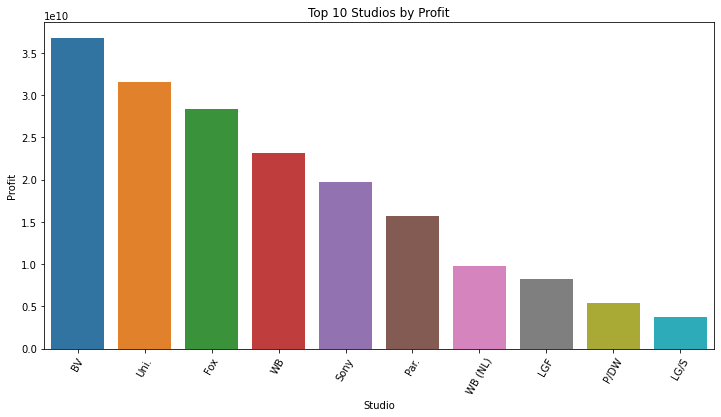

In [46]:
# Create a bar plot using Seaborn
fig, ax = plt.subplots(figsize=(12, 6))
ax = sns.barplot(x=top_10_studios.index, y=top_10_studios.values)
ax.set_title('Top 10 Studios by Profit')
ax.set_xlabel('Studio')
ax.set_ylabel('Profit')
plt.xticks(rotation=60)

plt.show()

From the above plot analysis we can see the BV studio made the highest profits follwed by Uni studio then Fox studio. LG/S made the least profit among the top 10 studios.

2.Determining the most common genre.

In [47]:
merged_imdb_df

,tconst,primary_title,original_title,start_year,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,"Action,Crime,Drama",7.00,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,"Biography,Drama",7.20,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,Drama,6.90,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,"Comedy,Drama",6.10,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,"Comedy,Drama,Fantasy",6.50,119
...,...,...,...,...,...,...,...
73047,tt9913056,Swarm Season,Swarm Season,2019,Documentary,6.20,5
73048,tt9913084,Diabolik sono io,Diabolik sono io,2019,Documentary,6.20,6
73049,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,"Drama,Family",8.70,136
73050,tt9914642,Albatross,Albatross,2017,Documentary,8.50,8


In [48]:
df = merged_imdb_df[['genres', 'averagerating', 'numvotes']].sort_values(by= 'numvotes', ascending = False)
df.head(10)

,genres,averagerating,numvotes
2374,"Action,Adventure,Sci-Fi",8.80,1841066
2228,"Action,Thriller",8.40,1387769
275,"Adventure,Drama,Sci-Fi",8.60,1299334
11963,"Drama,Western",8.40,1211405
320,"Action,Adventure,Sci-Fi",8.10,1183655
502,"Biography,Crime,Drama",8.20,1035358
1080,"Mystery,Thriller",8.10,1005960
15184,"Action,Adventure,Comedy",8.10,948394
2817,"Action,Adventure,Comedy",8.00,820847
2510,"Action,Adventure,Sci-Fi",7.20,795227


In [49]:
# Calculate the total votes for each genre using groupby and sum
genres_votes = df.groupby('genres')['numvotes'].sum()
# Get the top 10 genres with the largest number of votes
top_10_genres = genres_votes.nlargest(10)

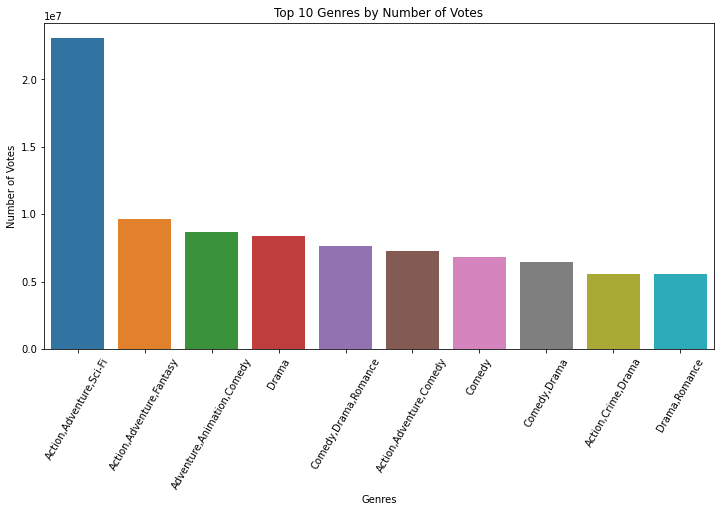

In [50]:
# Create a bar plot using Seaborn
fig, ax = plt.subplots(figsize=(12, 6))
ax = sns.barplot(x=top_10_genres.index, y=top_10_genres.values)
ax.set_title('Top 10 Genres by Number of Votes')
ax.set_xlabel('Genres')
ax.set_ylabel('Number of Votes')
plt.xticks(rotation=60)

plt.show()

In [51]:
#value counts of the genres column in the new dataset after separating the genres
top_genres = df['genres'].value_counts().nlargest(10).index
df_top_n_genres = df[df['genres'].isin(top_genres)]

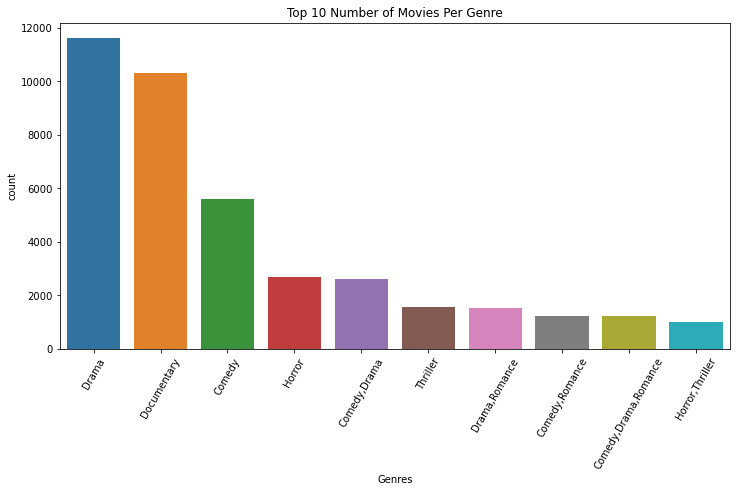

In [52]:
#countplot showing top 10 number of movies per genre
fig, ax = plt.subplots(figsize=(12,6))
ax = sns.countplot(x=df_top_n_genres['genres'], order=top_genres)
ax.set_title('Top 10 Number of Movies Per Genre')
ax.set_xlabel('Genres')
plt.xticks(rotation=60);

From the above plot, drama,documentary and comedy are the most common among the movies released.

3. Which genre of movies have a higher average rating?

In [53]:
df = merged_imdb_df[['genres', 'averagerating', 'numvotes']].sort_values(by= 'averagerating', ascending = False)
df.head(20)

,genres,averagerating,numvotes
9664,"Crime,Documentary",10.00,5
53165,Documentary,10.00,5
65246,"Adventure,Comedy",10.00,6
42553,Documentary,10.00,6
49589,Documentary,10.00,8
868,"Comedy,Drama",10.00,5
52884,Documentary,10.00,6
70796,Documentary,10.00,5
49431,Drama,10.00,5
693,Documentary,10.00,5


In [54]:
# Calculate the average rating for each genre using groupby and sum
genres_rating = df.groupby('genres')['averagerating'].sum()
# Get the top 10 genres with the largest average rating
top_10_genres = genres_rating.nlargest(20)

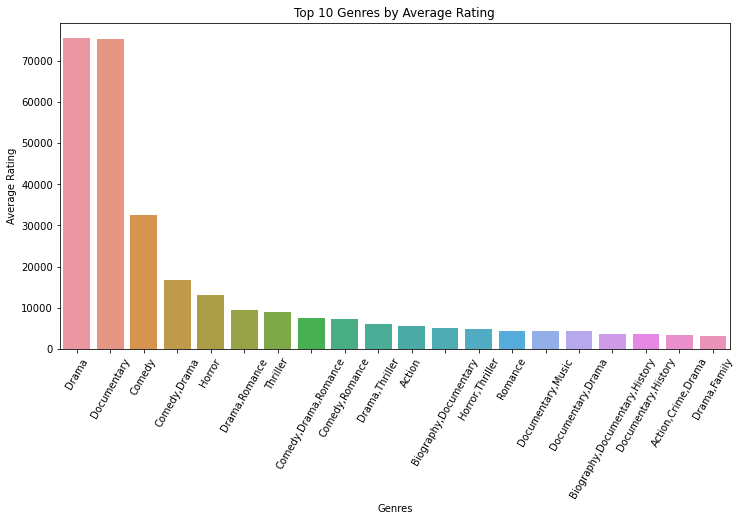

In [55]:
# Create a bar plot using Seaborn
fig, ax = plt.subplots(figsize=(12, 6))
ax = sns.barplot(x=top_10_genres.index, y=top_10_genres.values)
ax.set_title('Top 10 Genres by Average Rating')
ax.set_xlabel('Genres')
ax.set_ylabel('Average Rating')
plt.xticks(rotation=60)

plt.show()

Drama and Doumentary movies are the most rated 

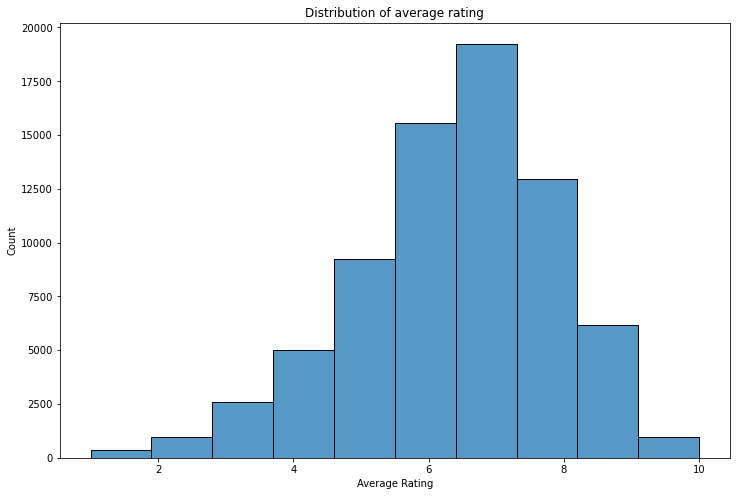

In [56]:
#histogram showing the average rating distribution
fig, ax = plt.subplots(figsize=(12,8))
sns.histplot(df['averagerating'], bins= 10, ax=ax)
ax.set_xlabel('Average Rating')
ax.set_title('Distribution of average rating');

The average rating for most films is roughly 7, and the distribution as a whole is typically adversely skewed. Only a few films are given ratings below 4.

## Conclusions
From te analysis we can conclude and make three recommendation to the head of  Microsoft CEO for decision making purposes.

1. Focus on producing of Drama movies, Documentaries and also  Action, Adventure, Sci-Fi were the most voted genre.  Based on the analysis, we can recommend Microsoft's new movie studio to focus on producing movies in genres that are currently popular and have a good track record at the box office.

2. I would also recommend for a collaboration with successful studios may also be taken to account to increase the likelihood that the new film studio would be successful.

3. Microsoft also need to carefully manage their production and investment cost as we have seen a positive correlation between production and profits hence have focus on doing high-production cost.
